In [1]:
import re
import requests
from bs4 import BeautifulSoup as bs

In [2]:
url='https://www.argenprop.com/inmuebles-venta-barrio-palermo'
url_base='https://www.argenprop.com'
response = requests.get(url)

In [3]:
def returnName(soup): 
    palabras=soup.find('h1',attrs={'listing-header__title'}).get_text().split()
    if( 'Venta' in palabras ):
        name='Venta_'+palabras[len(palabras)-1]
    else:
        if( 'Alquiler' in palabras ):
            name='Alquiler_'+palabras[len(palabras)-1]
    return name

In [4]:
if response.status_code == 200 :
    soup=bs(response.content,'html.parser')
    name_csv=returnName(soup)
    post=soup.find_all('a',attrs={'card'})
    aparthments=[ url_base + n.get('href') for n in post ] 

In [5]:
name_csv

'Venta_Palermo'

In [6]:
print(aparthments[1])

https://www.argenprop.com/departamento-en-venta-en-botanico-5-ambientes--11676949


In [7]:
def cleanData(price,expenses,direcction,coveredArea,bedrooms,antiquity,toilets,environments,garages,condition,provision):
    #price,expenses,direcction,coveredArea,bedrooms
    #antiquity,toilets,environments,garages,condition,provision
    currencyPurchase=price.split()[0]
    pricePurchase=price.split()[1]
    expensesCurrency=expenses.split()[1][0:1]
    expensesPrice=expenses.split()[1][1:]
    coveredArea=coveredArea.split()[0]
    bedrooms=bedrooms.split()[0]
    antiquity=antiquity.split()[0]
    toilets=toilets.split()[0]
    environments=environments.split()[0]
    garages=garages.split()[0]
    return ( currencyPurchase,pricePurchase,expensesCurrency,expensesPrice,direcction,coveredArea,bedrooms,antiquity,toilets,environments,garages,condition,provision )

In [32]:
listaAparthment=[]
for aparthment in aparthments:
    response = requests.get(aparthment)
    Aparthment=bs(response.content,'html.parser')
    listCaract = Aparthment.find('ul',attrs={'property-main-features'})



    price=Aparthment.find('p',attrs={'titlebar__price'}).get_text()
    try:
        expenses=Aparthment.find('p',attrs={'titlebar__expenses hide-in-mobile'}).get_text()
    except:
        expenses='    + $32.000 expensas   '
    direcction=Aparthment.find('h3',attrs={'titlebar__address'}).get_text()
    try:
        coveredArea =listCaract.find('li',attrs={'title':'Sup. cubierta'}).find('p',attrs={'strong'}).get_text()
    except:
        coveredArea='0 m² Cubierta'
    bedrooms =listCaract.find('li',attrs={'title':'Dormitorios'}).find('p',attrs={'strong'}).get_text()
    try:
        antiquity =listCaract.find('li',attrs={'title':'Antigüedad'}).find('p',attrs={'strong'}).get_text()
    except:
        antiquity = '10000 años'
    toilets =listCaract.find('li',attrs={'title':'Baños'}).find('p',attrs={'strong'}).get_text()
    environments =listCaract.find('li',attrs={'title':'Ambientes'}).find('p',attrs={'strong'}).get_text()
    try:
        garages =listCaract.find('li',attrs={'title':'Cocheras'}).find('p',attrs={'strong'}).get_text()
    except:
        garages = '0 cochera'
    try:
        condition =listCaract.find('li',attrs={'title':'Estado'}).find('p',attrs={'strong'}).get_text()
    except:
        condition=' '
    try:
        provision =listCaract.find('li',attrs={'title':'Disposición'}).find('p',attrs={'strong'}).get_text()
    except:
        provision=''

    listaAparthment.append( cleanData(price,expenses,direcction,coveredArea,bedrooms,antiquity,toilets,environments,garages,condition,provision) )

In [34]:
len(listaAparthment)

20

In [36]:

csv_headers=['currencyPurchase','pricePurchase','expensesCurrency','expensesPrice','direcction','coveredArea','bedrooms','antiquity','toilets','environments','garages','condition','provision']

In [39]:
def _save_cars(data_car,name,csv_headers):
    import csv
    out_file_name = 'Argenprop_{x}.csv'.format(x=name)
    
    with open(out_file_name, mode='w') as f:
        writer = csv.writer(f)
        writer.writerow(csv_headers)

        for data in data_car:
            row =data
            writer.writerow(row)

In [40]:
_save_cars(listaAparthment,name_csv,csv_headers)

In [45]:
pip install pandas

     |████████████████████████████████| 11.7 MB 60 kB/s  eta 0:00:01
     |████████████████████████████████| 17.1 MB 405 kB/s eta 0:00:01
     |████████████████████████████████| 500 kB 310 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd

In [48]:
data=pd.read_csv('Argenprop_Venta_Palermo.csv',encoding='utf-8')

In [49]:
data

,currencyPurchase,pricePurchase,expensesCurrency,expensesPrice,direcction,coveredArea,bedrooms,antiquity,toilets,environments,garages,condition,provision
0,USD,420.000,$,32.000,REPUBLICA DE LA INDIA 2900,90,2,15,2,3,1,Excelente,Contrafrente
1,USD,305.000,$,60.000,AV. SANTA FE 3300,165,4,10000,4,5,1,Excelente,Frente
2,USD,220.000,$,29.000,LAFINUR 2900,85,2,10000,2,3,0,Excelente,Contrafrente
3,USD,555.000,$,48.000,REPUBLICA DE LA INDIA 2900,130,3,15,3,4,1,Excelente,Frente
4,USD,87.000,$,8.000,Republica de la India 2800,35,1,10000,1,2,0,Excelente,Contrafrente
5,USD,230.000,$,9.000,JUAN MARIA GUTIERREZ 3800,95,2,10000,2,3,0,Excelente,Frente
6,USD,340.000,$,22.000,Charcas 4000,75,2,10000,2,3,1,Excelente,Contrafrente
7,USD,103.000,$,7.000,REPUBLICA DE LA INDIA 2800,35,1,10000,1,2,0,Excelente,Frente
8,USD,327.000,$,32.000,PARAGUAY 5600,115,2,14,2,3,1,Excelente,Frente
9,USD,330.000,$,15.000,Scalabrini Ortiz 1500,106,3,10000,3,4,2,Excelente,Frente


In [53]:
#pip install seaborn

In [54]:
import seaborn as sns

<AxesSubplot: >

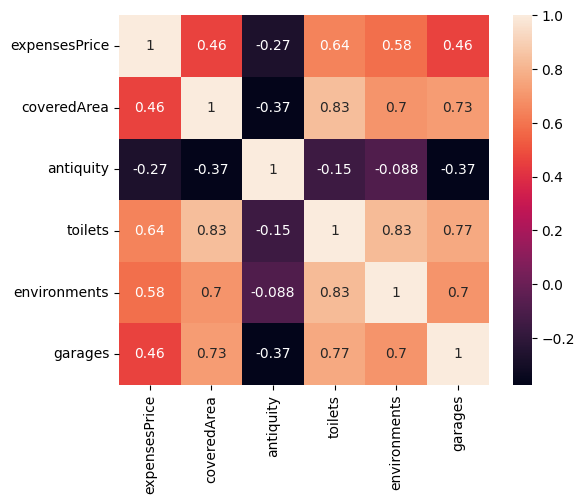

In [55]:
sns.heatmap(data.corr(), square=True, annot=True)

In [15]:
#for aparthment in aparthments:
aparthment=aparthments[0]
#print(aparthment)
response = requests.get(aparthment)
Aparthment=bs(response.content,'html.parser')
listCaract = Aparthment.find('ul',attrs={'property-main-features'})
#print(listCaract)



price=Aparthment.find('p',attrs={'titlebar__price'}).get_text()
expenses=Aparthment.find('p',attrs={'titlebar__expenses hide-in-mobile'}).get_text()
direcction=Aparthment.find('h3',attrs={'titlebar__address'}).get_text()
 
listado =listCaract.find_all('div',attrs={'desktop'})

for x in listado:
    print(x.get_text()) 

#print(price,expenses,direcction,coveredArea,bedrooms,antiquity,toilets,environments,garages,condition,provision)



90  m² Cubierta


2 dormitorios


15 años 


2 baños


3 ambientes


1 cochera


Excelente 


Contrafrente 

